In [5]:
%pylab notebook
from charistools.readers import ModisTileCube
from charistools.readers import read_tile
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np

Populating the interactive namespace from numpy and matplotlib


/Users/brodzik/.conda/envs/pmesdr/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%cd /Users/brodzik/projects/CHARIS/albedo/MOD10A1_Collection_005/MOD10A1_005_GF/v06/h23v05
%ls

/Users/brodzik/projects/CHARIS/albedo/MOD10A1_Collection_005/MOD10A1_005_GF/v06/h23v05
MOD10A1_GF_Albedo_shortwave.v0.6.h23v05_2001.h5
MOD10A1_GF_Albedo_shortwave.v0.6.h23v05_2002.h5
MOD10A1_GF_Albedo_shortwave.v0.6.h23v05_2003.h5
MOD10A1_GF_Albedo_shortwave.v0.6.h23v05_2004.h5
MOD10A1_GF_Albedo_shortwave.v0.6.h23v05_2005.h5
MOD10A1_GF_Albedo_shortwave.v0.6.h23v05_2006.h5
MOD10A1_GF_Albedo_shortwave.v0.6.h23v05_2007.h5
MOD10A1_GF_Albedo_shortwave.v0.6.h23v05_2008.h5
MOD10A1_GF_Albedo_shortwave.v0.6.h23v05_2009.h5
MOD10A1_GF_Albedo_shortwave.v0.6.h23v05_2010.h5
MOD10A1_GF_Albedo_shortwave.v0.6.h23v05_2011.h5
MOD10A1_GF_Albedo_shortwave.v0.6.h23v05_2012.h5
MOD10A1_GF_Albedo_shortwave.v0.6.h23v05_2013.h5
MOD10A1_GF_Albedo_shortwave.v0.6.h23v05_2014.h5


In [6]:
h23Filev5 = "/Users/brodzik/projects/CHARIS/albedo/MOD10A1_Collection_005/" \
"MOD10A1_005_GF/v05/h23v05/MOD10A1_GF_Albedo_shortwave.v0.5.h23v05_2001.h5"
h23Filev6 = "/Users/brodzik/projects/CHARIS/albedo/MOD10A1_Collection_005/" \
"MOD10A1_005_GF/v06/h23v05/MOD10A1_GF_Albedo_shortwave.v0.6.h23v05_2001.h5"
print(h23Filev5)
print(h23Filev6)

/Users/brodzik/projects/CHARIS/albedo/MOD10A1_Collection_005/MOD10A1_005_GF/v05/h23v05/MOD10A1_GF_Albedo_shortwave.v0.5.h23v05_2001.h5
/Users/brodzik/projects/CHARIS/albedo/MOD10A1_Collection_005/MOD10A1_005_GF/v06/h23v05/MOD10A1_GF_Albedo_shortwave.v0.6.h23v05_2001.h5


In [9]:
tile5 = ModisTileCube(filename=h23Filev5, varname='albedo_shortwave')
tile6 = ModisTileCube(filename=h23Filev6, varname='albedo_shortwave')

In [10]:
albedo5 = tile5.read(doy=180)
albedo6 = tile6.read(doy=180)

In [11]:
print(type(albedo5))
print(type(albedo6))


<type 'numpy.ndarray'>
<class 'numpy.ma.core.MaskedArray'>


In [13]:
#print(albedo5.count())
print(albedo6.count())

227569


In [17]:
print(np.amin(albedo5), np.amax(albedo5))
print(np.amin(albedo5[albedo5 > 0.]), np.amax(albedo5))
print(np.amin(albedo6), np.amax(albedo6))

(0.0, 1.0)
(0.0099999998, 1.0)
(0.0099999998, 1.0)


In [18]:
sub = albedo5[albedo5 > 0.]
len(sub)

227569

In [32]:
_albedo5 = np.ma.masked_where(np.ma.getmask(albedo6), albedo5)

In [34]:
diff = albedo6 - _albedo5
print(np.amin(diff), np.amax(diff))


(0.0, 0.0)


In [35]:
test = albedo5[np.ma.getmask(albedo6)]
len(test)

5532431

In [36]:
print(np.amin(test), np.amax(test))

(0.0, 0.0)


In [47]:
test = np.ma.masked_array(np.arange(5.), mask=[False, True, True, False, False])
print(type(test))
print(test)


<class 'numpy.ma.core.MaskedArray'>
[0.0 -- -- 3.0 4.0]


In [55]:
new = np.arange(5)
print(new)
print(new[np.logical_and(~np.ma.getmaskarray(test), test > 2)])
print(new[np.logical_and(~np.ma.getmaskarray(test), test <= 2)])

[0 1 2 3 4]
[3 4]
[0]


In [54]:
other = np.arange(5)
print(type(other))
print(other)
print(np.ma.getmaskarray(other))
_other = np.ma.masked_where(np.ma.getmask(test), other) 
print(type(_other))
print(_other)
print(np.ma.getmaskarray(_other))


<type 'numpy.ndarray'>
[0 1 2 3 4]
[False False False False False]
<class 'numpy.ma.core.MaskedArray'>
[0 -- -- 3 4]
[False  True  True False False]


In [39]:
myarr = np.arange(5)
_myarr = myarr.copy()
print(myarr)
print(_myarr)

[0 1 2 3 4]
[0 1 2 3 4]


In [40]:
_myarr[3] = 0
print(myarr)
print(_myarr)

[0 1 2 3 4]
[0 1 2 0 4]


<IPython.core.display.Javascript object>


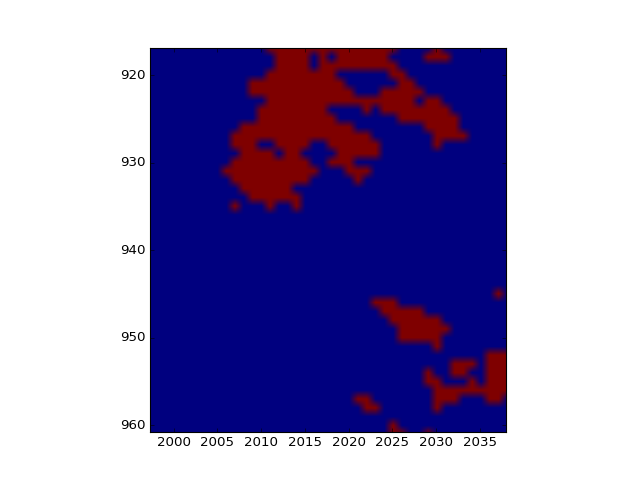

In [7]:
plt.imshow(albedo)

In [8]:
%cd /Users/brodzik/projects/CHARIS/snow_cover/modice.v0.4/min05yr_nc
%ls


/Users/brodzik/projects/CHARIS/snow_cover/modice.v0.4/min05yr_nc
MODICE.v0.4.h22v04.1strike.min05yr.mask.nc
MODICE.v0.4.h22v04.2strike.min05yr.mask.nc
MODICE.v0.4.h22v04.3strike.min05yr.mask.nc
MODICE.v0.4.h22v05.1strike.min05yr.mask.nc
MODICE.v0.4.h22v05.2strike.min05yr.mask.nc
MODICE.v0.4.h22v05.3strike.min05yr.mask.nc
MODICE.v0.4.h23v04.1strike.min05yr.mask.nc
MODICE.v0.4.h23v04.2strike.min05yr.mask.nc
MODICE.v0.4.h23v04.3strike.min05yr.mask.nc
MODICE.v0.4.h23v05.1strike.min05yr.mask.nc
MODICE.v0.4.h23v05.2strike.min05yr.mask.nc
MODICE.v0.4.h23v05.3strike.min05yr.mask.nc
MODICE.v0.4.h23v06.1strike.min05yr.mask.nc
MODICE.v0.4.h23v06.2strike.min05yr.mask.nc
MODICE.v0.4.h23v06.3strike.min05yr.mask.nc
MODICE.v0.4.h24v04.1strike.min05yr.mask.nc
MODICE.v0.4.h24v04.2strike.min05yr.mask.nc
MODICE.v0.4.h24v04.3strike.min05yr.mask.nc
MODICE.v0.4.h24v05.1strike.min05yr.mask.nc
MODICE.v0.4.h24v05.2strike.min05yr.mask.nc
MODICE.v0.4.h24v05.3strike.min05yr.mask.nc
MODICE.v0.4.h24v06.1strike.min05

In [9]:
modice = read_tile(filename="MODICE.v0.4.h23v05.1strike.min05yr.mask.nc",
                   varname="modice_min_year_mask")

In [10]:
np.amin(modice), np.amax(modice)

(0, 2)

In [14]:
plt.imshow(modice)

In [12]:
unclass = np.logical_and(albedo.mask, modice == 2).astype(float)
print(unclass.shape)
print(np.amin(unclass))
print(np.amax(unclass))

(2400, 2400)
0.0
1.0


In [13]:
plt.imshow(unclass)

In [ ]:
x = np.arange(5.)
x[2] = 1.e20
x[3] = 1.e20
x

In [ ]:
y = np.ma.masked_values(x,1.e20)
print(type(y))
print(y)

In [ ]:
modice = np.asarray([0, 2, 0, 2, 1])
modice

In [ ]:
print(y.mask)
print(modice == 2)

In [ ]:
np.logical_and(y.mask, modice == 2).astype(float)

In [ ]:
unclass = np.zeros(5)
unclass[np.logical_and(y.mask, modice == 2)] = 1
unclass
#idx = where(y is masked and modice==2)

In [ ]:
[np.logical_and(y.mask, modice == 2)] = 1